# Data Visualization using Python
### Muluken Muche
This data visualization use several python libraries to showcase available plots and charts to visualize publicly available NCSES data. The libraries include  seaborn, matplotlib, bokeh, plotly, ggplot, altair, and geoplotlib as necessary. The purpose is to create a template of figures so that we could use for similar data. Python codes are adopted from several freely available websites. These figures and charts  are based on publicly available NCSES data.   

In [1]:
# Importind libraries
import os
import sys
import openpyxl
import pygal
import pyodbc
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics import mosaicplot
from statsmodels.graphics.mosaicplot import mosaic
sns.set(style="ticks", color_codes=True)
from rpy2.robjects.packages import importr
import requests
import time
import xlrd
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

## 1) Doctorate Recipients of Science &E and Non-S&E by Broad and Detailed Fields (1958 - 2018)

The data is downloaded fromData Download from NCSES Interactive Data Tool. 				
https://ncses.norc.org/NSFTabEngine/#TABULATION. 

In [2]:
# Reading data from SQL Server in local machine
conn = pyodbc.connect("Driver={SQL Server};"
                      "Server=DESKTOP-MS8S2RN;"
                      "Database=NCSES;"
                      "Trusted_Connection=yes;"
)   

cursor = conn.cursor()

df1 = pd.read_sql_query('SELECT * from dbo.SED1',conn)
df1 = df1.set_index(['S&E Fields', 'Broad Fields', 'Detailed Fields'])
df1.head(3)
#df1.columns

2018  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        42227.0   
                        Life sciences Total                                        12780.0   
                                      Agricultural sciences and natural resources   1445.0   

                                                                                      2017  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        41294.0   
                        Life sciences Total                                        12555.0   
                                      Agricultural sciences and natural resources   1494.0   

                                                                                      2016  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        41234.0   
                        Life sciences Total                                        12536.0   
                                      Agricultural sciences and natural resources   1378.0   

                                                                                      2015  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        41178.0   
                        Life sciences Total                                        12493.0   
                                      Agricultural sciences and natural resources   1434.0   

                                                                                      2014  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        40633.0   
                        Life sciences Total                                        12484.0   
                                      Agricultural sciences and natural resources   1338.0   

                                                                                      2013  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        39031.0   
                        Life sciences Total                                        12207.0   
                                      Agricultural sciences and natural resources   1324.0   

                                                                                      2012  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        37846.0   
                        Life sciences Total                                        11964.0   
                                      Agricultural sciences and natural resources   1255.0   

                                                                                      2011  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        36332.0   
                        Life sciences Total                                        11535.0   
                                      Agricultural sciences and natural resources   1206.0   

                                                                                      2010  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        34997.0   
                        Life science

In [3]:
# Data wrangling for proper formatting of visualizatiom
df1s = df1.stack()
df1s =df1s.to_frame()
df1s.head(10)
df1s = df1s.reset_index()
df1s.columns = ['S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']
# # df1s.columns
df1s.head(3)
df1s.shape

(2670, 5)

In [4]:
df1s = df1s[df1s['Detailed Fields'] != 'Total']
df1s = df1s.reset_index()
df1s = df1s[['S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']]
df1s.head(3)
#df1s.shape
# df1s.dtypes

,S&E Fields,Broad Fields,Detailed Fields,Year,Number
0,Science and engineering,Life sciences,Agricultural sciences and natural resources,2018,1445.0
1,Science and engineering,Life sciences,Agricultural sciences and natural resources,2017,1494.0
2,Science and engineering,Life sciences,Agricultural sciences and natural resources,2016,1378.0


### 1.1)   Bar Plots
The following stacked bar chart shows Science and Engineering versus Non-Science and Engineering doctorate recipients from 1958 to 2018. We can see that the magnitude of Science and Engineering doctorate recipients were increasing compared to the non-S&E. 

Text(0, 0.5, 'Year')

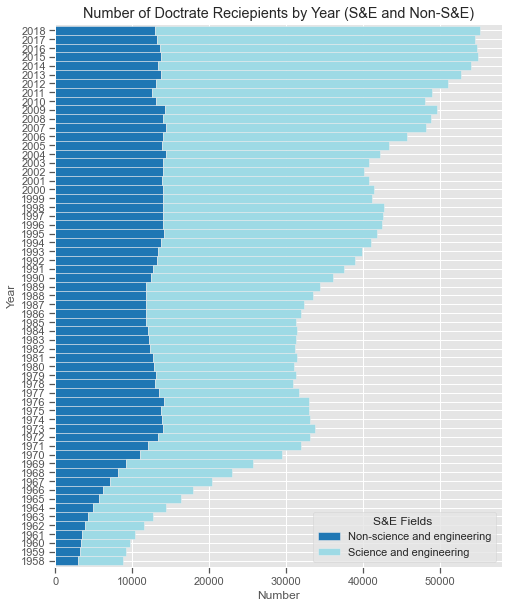

In [5]:
p1 =  df1s.groupby(['S&E Fields', 'Year'])['Number'].sum()
p1 = p1.reset_index()
p1.head(20)
p1=p1.pivot(index='Year', columns='S&E Fields', values='Number')
p1.head(40)
p1.shape
# Adding the stacked=True option to plot() 
# creates a stacked bar plot
p1.plot(kind='barh',colormap='tab20',figsize=(8, 10), width=1.0, stacked=True).legend(
    loc='lower right', ncol=1, title="S&E Fields ")
plt.title("Number of Doctrate Reciepients by Year (S&E and Non-S&E)")
plt.xlabel("Number")
plt.ylabel("Year")

The following chart is just the above one in different way.

Text(0, 0.5, 'Number of Doctorate Recipients')

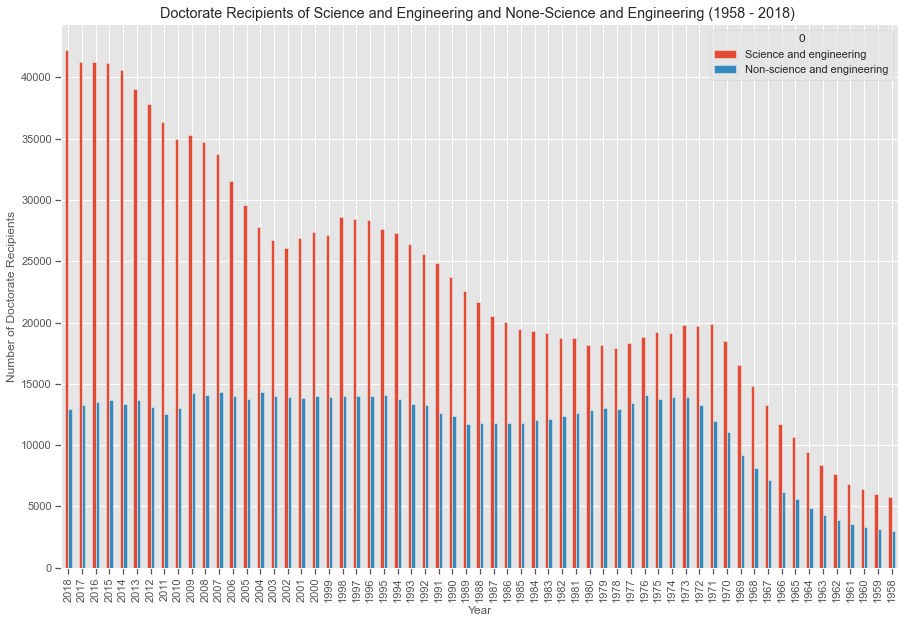

In [6]:
df1.head(3)
SE_NSE = df1.reset_index()
SE_NSE = SE_NSE[SE_NSE['Broad Fields'] == 'Total']

SE_NSE.head()

SE_NSE_T = SE_NSE.T  # Transpose
SE_NSE_T = SE_NSE_T .reset_index()  # setting numerical index
SE_NSE_T.columns = SE_NSE_T.iloc[0] # Setting the first row as a column
SE_NSE_T = SE_NSE_T.set_index(['S&E Fields']) # setting S&E Fields column as an index
SE_NSE_T = SE_NSE_T.drop(['S&E Fields','Broad Fields', 'Detailed Fields'])  # dropping the first two rows 
                       #since it is created in the process but unnecessary
SE_NSE_T.head()
SE_NSE_T.plot(kind="bar", figsize=(15, 10))
plt.title("Doctorate Recipients of Science and Engineering and None-Science and Engineering (1958 - 2018) ")
plt.xlabel("Year")
plt.ylabel("Number of Doctorate Recipients")

The chart below shows doctorate recipients by broad fields both Science and Engineering (Engineering,Life Science, Mathematics and Computer Sciences, Physical Sciences and Earth Sciences, Psychology and Social Sciences) and Non-Science and Engineering (Education, Humanities and Arts, and Other non-S&E) from 1958 to 2018. We can see that Engineering and Life Sciences doctrate recipients are are relatively increasing in recent years where as Education doctrate recipients are somewhat decreasing in recent years.

Text(0, 0.5, 'Year')

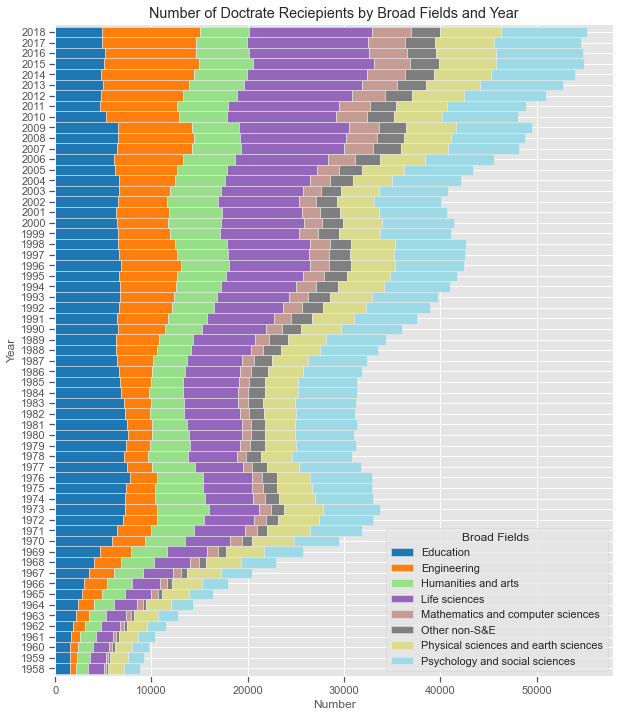

In [7]:
p2 =  df1s.groupby(['Broad Fields', 'Year'])['Number'].sum()
p2 = p2.reset_index()
p2=p2.pivot(index='Year', columns='Broad Fields', values='Number')


# Adding the stacked=True option to plot() 
# creates a stacked bar plot
p2.plot(kind='barh',colormap='tab20',figsize=(10, 12), width=1.0, stacked=True).legend(
    loc='lower right', ncol=1, title="Broad Fields ")
plt.title("Number of Doctrate Reciepients by Broad Fields and Year")
plt.xlabel("Number")
plt.ylabel("Year")

The bars below show doctorate recipients by detailed fields studies in both Science and Engineering  and Non-Science and Engineering from 1958 to 2018. Similar colors with different intensities show each broad fields in the above chart. Biological and biomedical sciences doctorates were the most increasing field of study especially in the last 12 years.

Text(0, 0.5, 'Year')

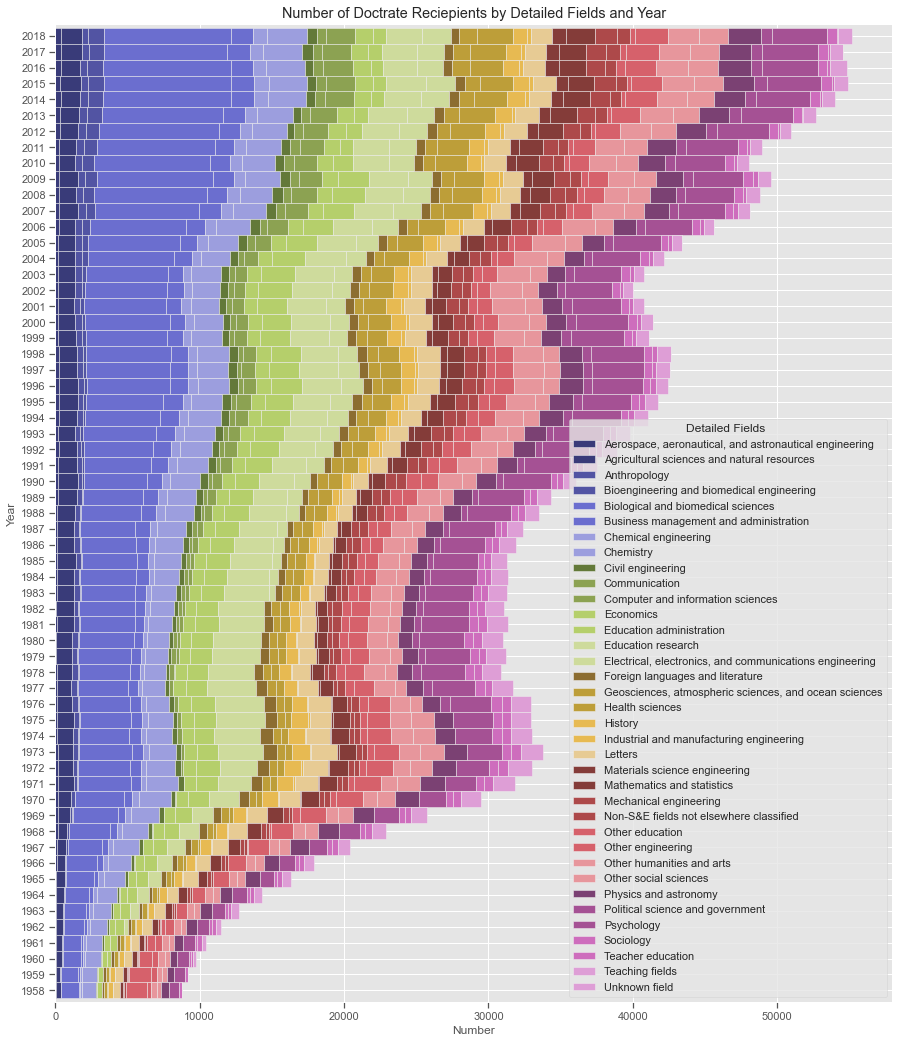

In [8]:
p3 =  df1s.groupby(['Detailed Fields', 'Year'])['Number'].sum()
p3 = p3.reset_index()
p3=p3.pivot(index='Year', columns='Detailed Fields', values='Number')


# Adding the stacked=True option to plot() 
# creates a stacked bar plot
p3.plot(kind='barh',colormap='tab20b',figsize=(15, 18), width=1.0, stacked=True).legend(
    loc='lower right', ncol=1, title="Detailed Fields ")
plt.title("Number of Doctrate Reciepients by Detailed Fields and Year")
plt.xlabel("Number")
plt.ylabel("Year")
#plt.legend(title="Line", loc='upper left', handles=handles[::-1])

In [9]:
# df1s['S&E Fields'].unique()
# df1s.count()
# df1s['Broad Fields'].unique()
# df = df1s.groupby('Broad Fields')['Number'].nunique()
# df.count()

# df1s['Detailed Fields'].unique()
# df = df1s.groupby('Detailed Fields')['Number'].nunique()
# df.count()

# df1s['Year'].unique()
# df = df1s.groupby('Year')['Number'].nunique()
# df.count()

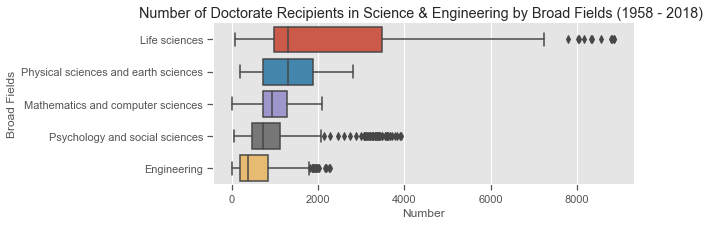

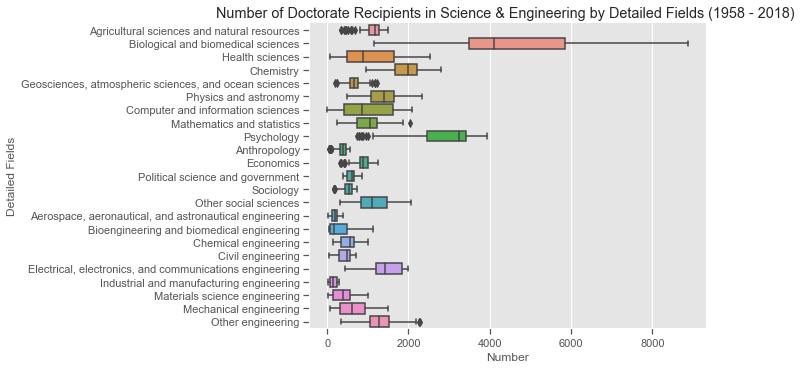

In [10]:
df1s.head()
SE = df1s[df1s['S&E Fields'] == 'Science and engineering']
SE.head()

sns.catplot(y="Broad Fields", x="Number", kind="box",height=3, aspect=3,
            data=SE).set(title="Number of Doctorate Recipients in Science & Engineering by Broad Fields (1958 - 2018) ");
sns.catplot(y="Detailed Fields", x="Number", kind="box",height=5, aspect=2,
            data=SE).set(title="Number of Doctorate Recipients in Science & Engineering by Detailed Fields (1958 - 2018) ");



#plt.annotate('Note: Data include 8 major field of studies', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')


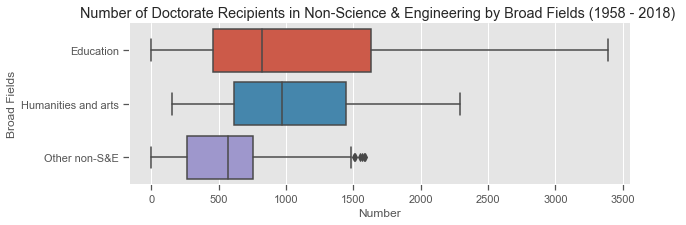

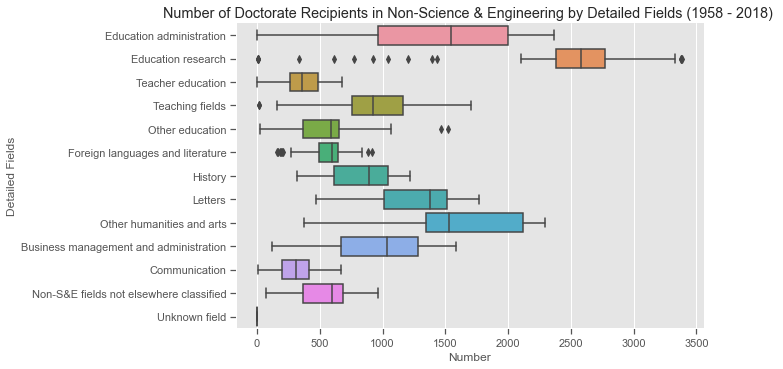

In [11]:
df1s.head()
NSE = df1s[df1s['S&E Fields'] != 'Science and engineering']
NSE.head()
sns.catplot(y="Broad Fields", x="Number", kind="box",height=3, aspect=3,
            data=NSE).set(title="Number of Doctorate Recipients in Non-Science & Engineering by Broad Fields (1958 - 2018) ");
sns.catplot(y="Detailed Fields", x="Number", kind="box",height=5, aspect=2,
            data=NSE).set(title="Number of Doctorate Recipients in Non-Science & Engineering by Detailed Fields (1958 - 2018) ");

In [12]:
SE_NSE_T = SE_NSE_T .reset_index()  # setting numerical index
SE_NSE_T = SE_NSE_T[['S&E Fields','Science and engineering','Non-science and engineering']]
SE_NSE_T.columns = [ 'Year', 'Science and engineering','Non-science and engineering']
SE_NSE_T = SE_NSE_T.set_index(['Year']) # setting S&E Fields column as an index
#SE_NSE_T = SE_NSE_T.drop(['S&E Fields','Broad Fields', 'Detailed Fields'])  # dropping the first two rows 
SE_NSE_TT = SE_NSE_T.T
# SE_NSE_TT.columns = SE_NSE_TT.iloc[0] # Setting the first row as a column
# SE_NSE_TT = SE_NSE_TT.set_index(['S&E Fields']) # setting S&E Fields column as an index
SE_NSE_TT.head()
#SE_NSE_T.head()
se = tuple(list(SE_NSE_TT.loc['Science and engineering']))
nse =tuple(list(SE_NSE_TT.loc['Non-science and engineering']))


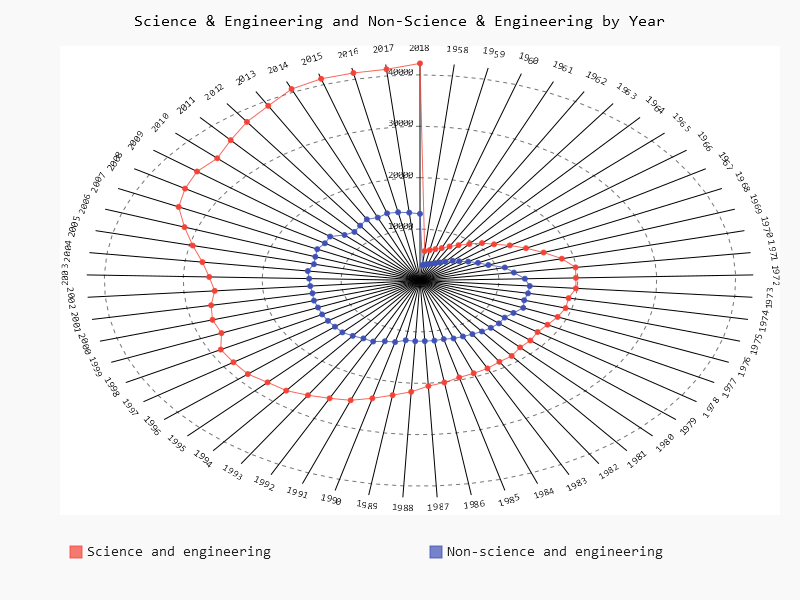

In [13]:
radar_chart = pygal.Radar( human_readable=True, legend_at_bottom=True)
radar_chart.title = 'Science & Engineering  and Non-Science & Engineering by Year'
radar_chart.x_labels = [ '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007',
       '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998',
       '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989',
       '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980',
       '1979', '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963', '1962',
       '1961', '1960', '1959', '1958']
radar_chart.add('Science and engineering',se)
radar_chart.add('Non-science and engineering',nse)

In [48]:
df1s.head()
LSc   = df1s[df1s['Broad Fields'] == 'Life sciences']
PSES = df1s[df1s['Broad Fields'] == 'Physical sciences and earth sciences']
MCS   = df1s[df1s['Broad Fields'] == 'Mathematics and computer sciences']
PSYC  = df1s[df1s['Broad Fields'] == 'Psychology and social sciences ']
Engr  = df1s[df1s['Broad Fields'] == 'Engineering']
Edu = df1s[df1s['Broad Fields'] == 'Education']
HumAr = df1s[df1s['Broad Fields'] == 'Humanities and arts']
Oth  = df1s[df1s['Broad Fields'] == 'Other']

# SE = df1s[df1s['S&E Fields'] == 'Science and engineering']
# NSE = df1s[df1s['S&E Fields'] != 'Science and engineering']

LSc.head()

,S&E Fields,Broad Fields,Detailed Fields,Year,Number
0,Science and engineering,Life sciences,Agricultural sciences and natural resources,2018,1445.0
1,Science and engineering,Life sciences,Agricultural sciences and natural resources,2017,1494.0
2,Science and engineering,Life sciences,Agricultural sciences and natural resources,2016,1378.0
3,Science and engineering,Life sciences,Agricultural sciences and natural resources,2015,1434.0
4,Science and engineering,Life sciences,Agricultural sciences and natural resources,2014,1338.0


In [53]:
LSc1 = LSc[['Detailed Fields','Number']]
LSc1.head()

,Detailed Fields,Number
0,Agricultural sciences and natural resources,1445.0
1,Agricultural sciences and natural resources,1494.0
2,Agricultural sciences and natural resources,1378.0
3,Agricultural sciences and natural resources,1434.0
4,Agricultural sciences and natural resources,1338.0


AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

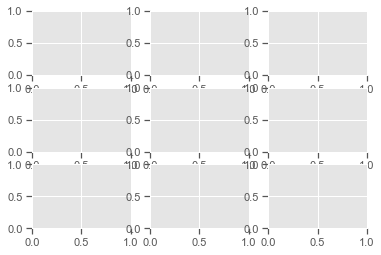

In [54]:
import warnings
warnings.filterwarnings("ignore")
#chmod g-wx,o-wx ~/.python-eggs
fig, axes = plt.subplots(nrows=3, ncols=3)
LSc1.plot(ax=axes[0], kind = 'bar', grid=True)

# # fig.suptitle('Bike Rentals at Different Temperatures\nBy Season', fontsize=25,fontweight="bold", color="black", 
# #              position=(0.5,1.01))
# sns.set(style="whitegrid")

# g1 = sns.FacetGrid(LSc, col="Broad Fields", hue_order="Detailed Fields",  height=3, aspect=2)

# g1.map(sns.barplot, "Detailed Fields", "Number");
# g1.set_xticklabels(rotation=15)

# g4 = sns.FacetGrid(LSc, row="Broad Fields", hue_order="Detailed Fields",  height=3, aspect=2)
# g4.map(sns.barplot, "Detailed Fields", "Number");
# g4.set_xticklabels(rotation=15)
# g2= sns.FacetGrid(PSES, col="Broad Fields", hue_order="Detailed Fields",  height=3, aspect=2)
# g2.map(sns.barplot, "Detailed Fields","Number" );
# #g.fig.suptitle("Doctorate Recipients Number of Selected Years by Sex")
# g2.set_xticklabels(rotation=15)

# g3= sns.FacetGrid(MCS, col="Broad Fields", hue_order="Detailed Fields",  height=3, aspect=2)
# g3.map(sns.barplot, "Detailed Fields","Number" );
# #g.fig.suptitle("Doctorate Recipients Number of Selected Years by Sex")
# g3.set_xticklabels(rotation=15)

<Figure size 432x288 with 0 Axes>

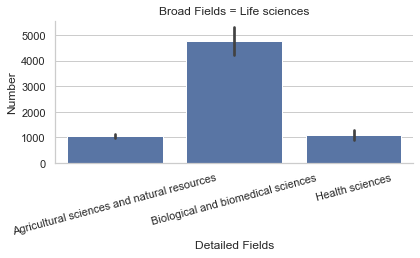

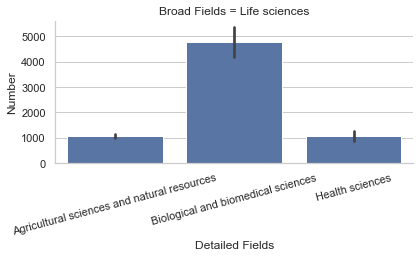

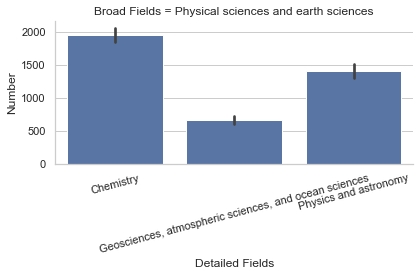

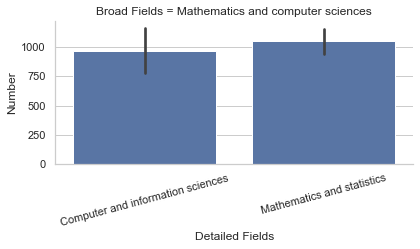

In [20]:
import warnings
warnings.filterwarnings("ignore")
#chmod g-wx,o-wx ~/.python-eggs
fig = plt.figure()
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# fig.suptitle('Bike Rentals at Different Temperatures\nBy Season', fontsize=25,fontweight="bold", color="black", 
#              position=(0.5,1.01))
sns.set(style="whitegrid")

g1 = sns.FacetGrid(LSc, col="Broad Fields", hue_order="Detailed Fields",  height=3, aspect=2)

g1.map(sns.barplot, "Detailed Fields", "Number");
g1.set_xticklabels(rotation=15)

g4 = sns.FacetGrid(LSc, row="Broad Fields", hue_order="Detailed Fields",  height=3, aspect=2)
g4.map(sns.barplot, "Detailed Fields", "Number");
g4.set_xticklabels(rotation=15)
g2= sns.FacetGrid(PSES, col="Broad Fields", hue_order="Detailed Fields",  height=3, aspect=2)
g2.map(sns.barplot, "Detailed Fields","Number" );
#g.fig.suptitle("Doctorate Recipients Number of Selected Years by Sex")
g2.set_xticklabels(rotation=15)

g3= sns.FacetGrid(MCS, col="Broad Fields", hue_order="Detailed Fields",  height=3, aspect=2)
g3.map(sns.barplot, "Detailed Fields","Number" );
#g.fig.suptitle("Doctorate Recipients Number of Selected Years by Sex")
g3.set_xticklabels(rotation=15)


In [ ]:
SE = df1s[df1s['S&E Fields'] == 'Science and engineering']
NSE = df1s[df1s['S&E Fields'] != 'Science and engineering']
sns.set(style="whitegrid")
g1 = sns.FacetGrid(SE, col="Broad Fields", hue_order="Detailed Fields",  height=3, aspect=2)

g1.map(sns.barplot,"Detailed Fields", "Number");
g1.set_xticklabels(rotation=15)

In [63]:
tips = sns.load_dataset("tips")
tips.head(30)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [54]:
#df1s.columns
#SE_NSE1.columns
SE_NSE1=df1s[['Detailed Fields', 'Year', 'Number']]

In [ ]:
SE_NSE2=SE_NSE1.pivot(index='Detailed Fields', columns='Year', values='Number')

In [ ]:
dic = SE_NSE2.to_dict('split')
#SE_NSE2.to_dict()
dic.values()
dic.keys()


In [ ]:
print(dic)
dic2 = ['index', 'data']
[dic[x] for x in dic2]

In [ ]:
dic2[0]

In [ ]:
dic['data']
#len(dic['data'])
#plt.plot(dic['data'])

In [ ]:
dic['index']
len(dic['index'])

In [ ]:
dic['columns']
len(dic['columns'])

In [ ]:
dic2 = dic['index'] + dic['data']
dic

In [ ]:
for key in dic.keys():
  print(key)

In [ ]:
type(dic['index'])

In [ ]:
df = pd.DataFrame({'col1': [1, 2],
...                    'col2': [0.5, 0.75]},
...                   index=['a', 'b'])
df.columns

In [ ]:
df.head()

In [ ]:
dic= df.to_dict()
dic.keys()

In [ ]:
df.to_dict('split')


In [ ]:

df = SE_NSE1.set_index('Year')
#print(df.T.to_dict(orient='list'))
print(df)

## 2) Doctorate Recipients of S&E and Non-S&E by DemographDoctrate reciepients by Citizenship,  Race/Ethnicity, Sex, S&E Fields, Broad Fields, Detailed Fields, and Year

In [ ]:
# Doctorate Recipients by Demographic Characteristics ---- Data by Citizenship,  Race/Ethnicity, Sex, S&E Fields, Broad Fields, Detailed Fields, and Year
# Data Download from NCSES Interactive Data Tool
df2 = pd.read_csv('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/SED_Export_2020-06-17T23_29_53.896Z.csv', skiprows=[0], header=[1])
df2 = df2.set_index(['Citizenship','Race and Ethnicity', 'Sex','S&E Fields', 'Broad Fields', 'Detailed Fields'])
df2.head()

In [ ]:
df2s = df2.stack()
df2s =df2s.to_frame()

df2s = df2s.reset_index()
df2s.columns = ['Citizenship','Race and Ethnicity', 'Sex','S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']
df2s.head(10)

In [ ]:
df2s = df2s[df2s['Detailed Fields'] != 'Total']
df2s = df2s.reset_index()
df2s = df2s[['Citizenship','Race and Ethnicity', 'Sex','S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']]
df2s.head()